# Production data EDA 

## Importing packages 

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Loading the data

Since the data is already cleaned in a previous notebook we can just load the cleaned dataset and dicve in to the analyses. 

In [2]:
df= pd.read_csv('../data/ProductionData/cleaned_energie_opwek.csv')
df


,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
0,2021-01-01 00:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,416000,416000,0.533333,124800,0.3
1,2021-01-01 01:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,430250,430250,0.551602,129075,0.3
2,2021-01-01 02:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436750,436750,0.559936,131025,0.3
3,2021-01-01 03:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436000,436000,0.558974,130800,0.3
4,2021-01-01 04:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,435500,435500,0.558333,130650,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
236506,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,0,0.0
236507,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,0,0.0
236508,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,0,0.0
236509,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,0,0.0


## Data analysis

### General distribution

First we will be looking at the general distribution of the data. We started it of with looking at how much data we have for each energy source. 

<Axes: xlabel='type'>

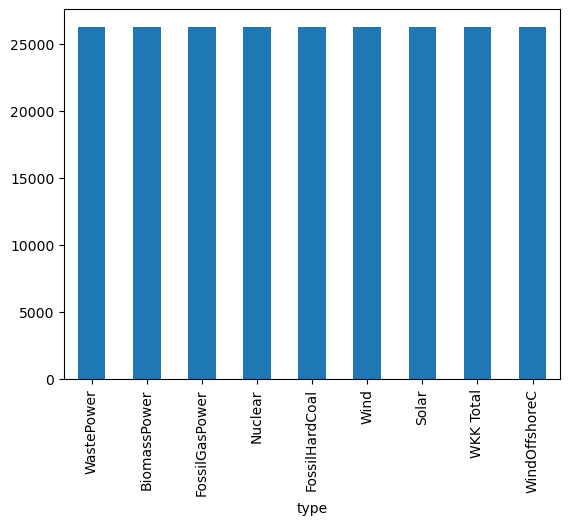

In [3]:
df['type'].value_counts().plot(kind='bar')

As visible in the above graph, there are 9 types of energy sources, of which wind offshore occurs the most in the dataset. It occurs 2 times more than each of the other sources. The rest occur the same amount of times in the dataset.

There is a type that is hard to understand because it is the only abbreviated name, so we will be changing that to the actual name.

In [4]:
df['type'] = df['type'].replace('WKK Total', 'WarmteKrachtKoppeling')

Next, we will be looking at the capacity each source brings to see if certain sources produce more per occurrence than others.

Text(0, 0.5, 'Total Capacity')

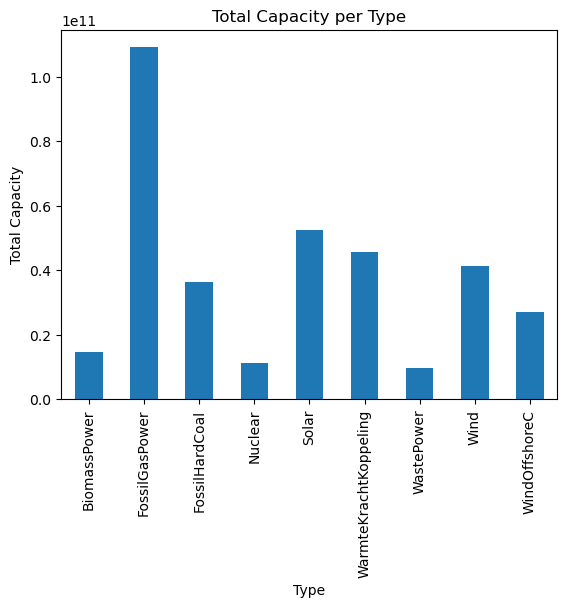

In [5]:
df.groupby('type')['capacity'].sum().plot(kind='bar')
plt.title('Total Capacity per Type')
plt.xlabel('Type')
plt.ylabel('Total Capacity')

Here you can see that offshore wind occurs more in the data but does not produce a lot per occurrence since regular wind, which occurred about half as much as offshore wind. Besides that, you can see that fossil gas produces a lot of energy compared to the rest, while biomass, nuclear, and waste power produce very little.

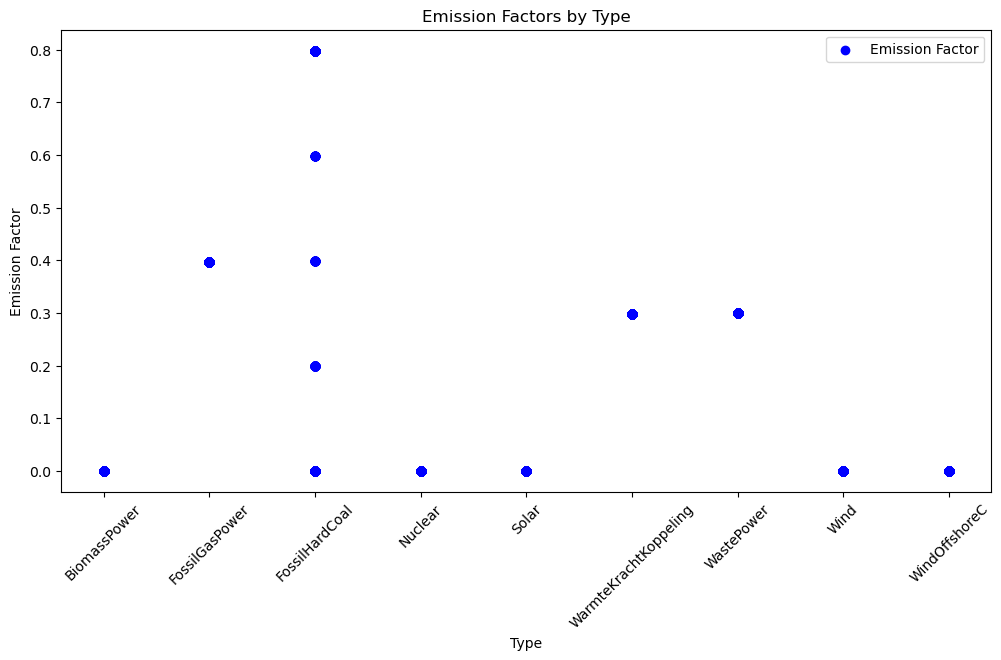

In [6]:
df = df.sort_values(by='type')

# Set figure size before plotting
plt.figure(figsize=(12, 6))

# Plot the line graph
plt.scatter(df['type'], df['emissionfactor'], color='b', label='Emission Factor')

# Add labels and title
plt.title('Emission Factors by Type')
plt.xlabel('Type')
plt.ylabel('Emission Factor')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()

There are emission factor values in the fossil hard coal type. This spikes interest regarding what the possible cause of this could be. So, we will be further inspecting this in the next section.

### Fosill hard coal

First, we will be looking at the different types this category contains.

In [7]:
# Filter the dataframe for FossilGasPower
fossil_gas_df = df[df['type'] == 'FossilHardCoal']

# Display the unique emission factors for FossilGasPower
unique_emission_factors = fossil_gas_df['emissionfactor'].unique()
print("Unique emission factors for FossilGasPower:", unique_emission_factors)

Unique emission factors for FossilGasPower: [0.         0.79799998 0.59850001 0.19949999 0.39899999]


It appears to just be five different values. Next, we will be looking if it has a correlation with one of the other columns.

C:\Users\Marjolein\AppData\Local\Temp\ipykernel_920\312434198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_gas_df['datetime'] = pd.to_datetime(fossil_gas_df['datetime'])


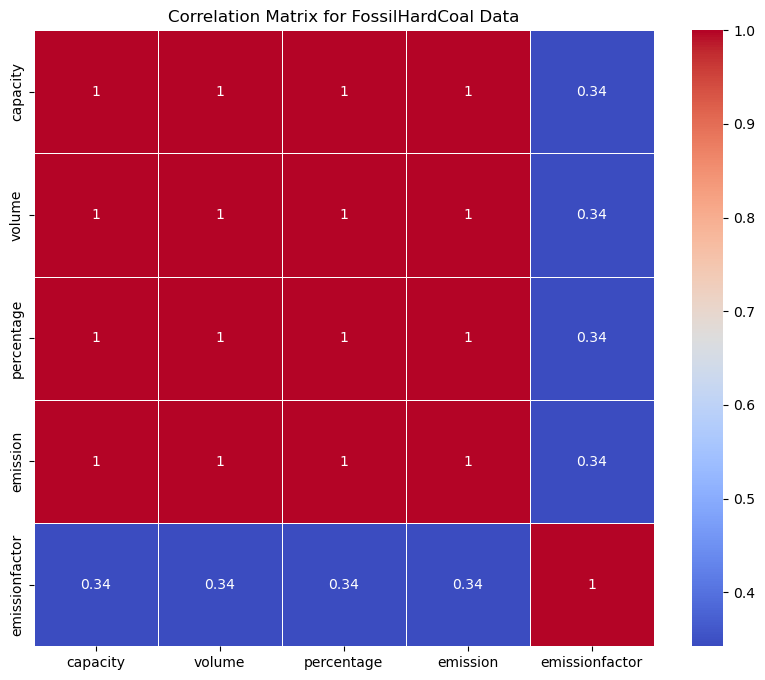

In [8]:
import seaborn as sns

# Filter the dataframe for FossilHardCoal
fossil_gas_df = df[df['type'] == 'FossilHardCoal']

# Ensure the datetime column is converted to datetime and set as index
fossil_gas_df['datetime'] = pd.to_datetime(fossil_gas_df['datetime'])
fossil_gas_df.set_index('datetime', inplace=True)

# Drop non-numeric columns before calculating the correlation matrix
numeric_fossil_gas_df = fossil_gas_df.drop(columns=['point', 'type', 'granularity', 'timezone', 'activity', 'classification'])

# Check for correlation between emission factors and other columns
correlation_matrix = numeric_fossil_gas_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for FossilHardCoal Data')
plt.show()

It doesn't really seem to be caused by any of the other numeric columns, so we will be looking for a trend within the date to see whether the temperature could affect the emission factor.

C:\Users\Marjolein\AppData\Local\Temp\ipykernel_920\1852447464.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_emission = fossil_gas_df['emission'].resample('M').sum()
C:\Users\Marjolein\AppData\Local\Temp\ipykernel_920\1852447464.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_emission = fossil_gas_df['emission'].resample('Y').sum()


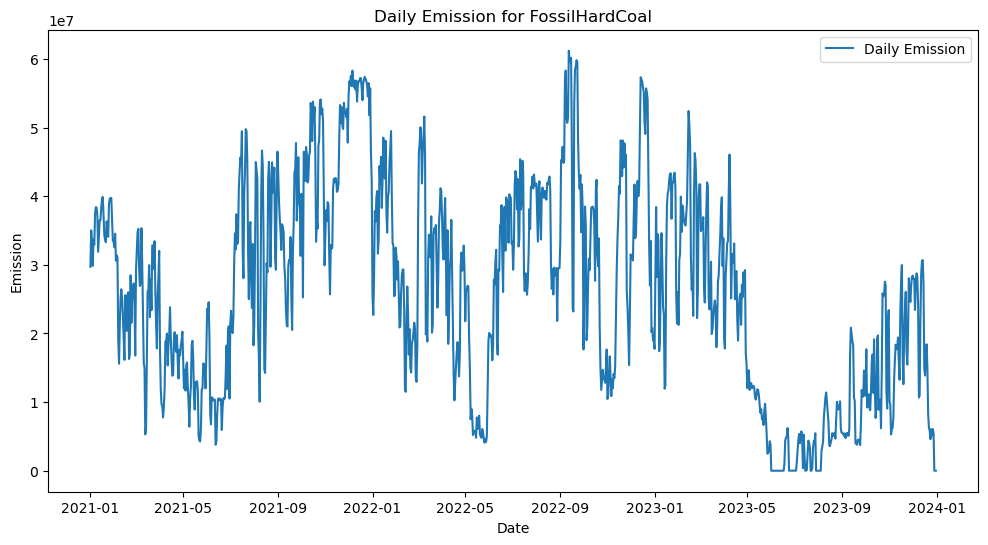

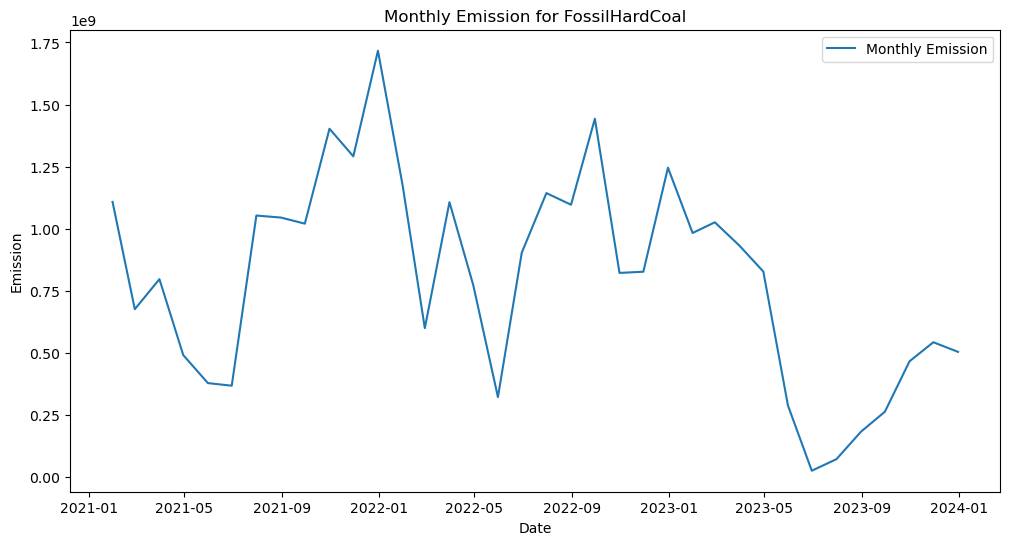

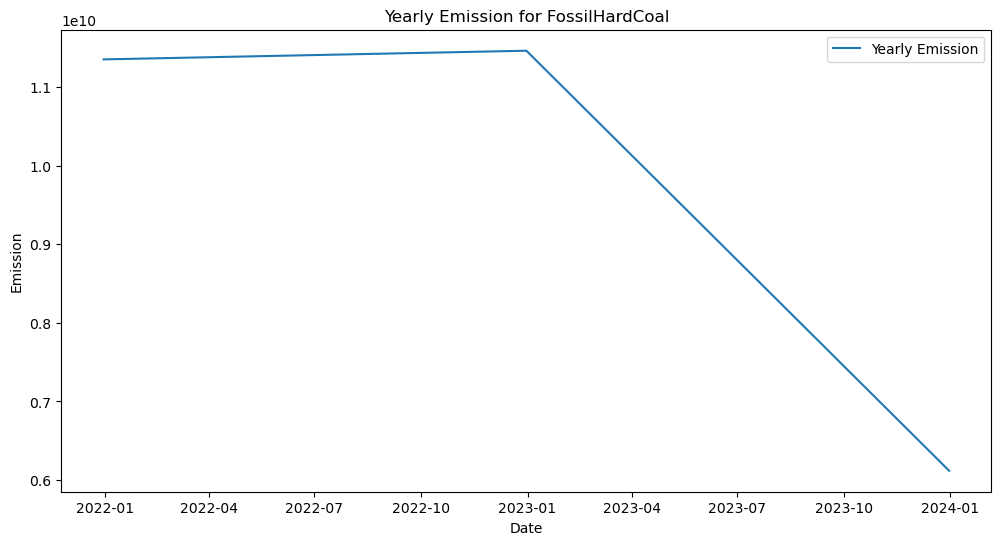

In [9]:
# Resample the data to daily, monthly, and yearly frequencies and calculate the sum of emissions
daily_emission = fossil_gas_df['emission'].resample('D').sum()
monthly_emission = fossil_gas_df['emission'].resample('M').sum()
yearly_emission = fossil_gas_df['emission'].resample('Y').sum()

# Plot the daily emission
plt.figure(figsize=(12, 6))
plt.plot(daily_emission, label='Daily Emission')
plt.title('Daily Emission for FossilHardCoal')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.legend()
plt.show()

# Plot the monthly emission
plt.figure(figsize=(12, 6))
plt.plot(monthly_emission, label='Monthly Emission')
plt.title('Monthly Emission for FossilHardCoal')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.legend()
plt.show()

# Plot the yearly emission
plt.figure(figsize=(12, 6))
plt.plot(yearly_emission, label='Yearly Emission')
plt.title('Yearly Emission for FossilHardCoal')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.legend()
plt.show()

In the monthly data, you can see there does appear to be a trend where around June the emission factor is lower, and in September it rises again.